In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns


from steves_utils.summary_utils import (
    get_experiments_from_path
)

from steves_utils.utils_v2 import (
    get_experiments_base_path
)

In [2]:
experiments_to_get = [
    "oracle.run2",
    "oracle.run1",
    "cores",
    "metehan",
    "wisig",
    "oracle.run1.framed",
    "oracle.run2.framed",
]

experiments = {}

for experiment in experiments_to_get:
    experiments[experiment] = get_experiments_from_path(
        os.path.join(get_experiments_base_path(), "baseline_ptn", experiment)
    )

In [3]:
for experiment,trials in experiments.items():
    assert len(trials) == 3

In [4]:
all_trials = pd.DataFrame(columns=[
    "experiment_name",
    "source_val_label_accuracy",
    "source_val_label_loss",
    "target_val_label_accuracy",
    "target_val_label_loss",
    "total_epochs_trained",
    "total_experiment_time_secs",
    "dtype",
])

for experiment in experiments_to_get:   
    for trial in experiments[experiment]:
        f = pd.DataFrame(trial["results"])
        f["experiment_name"] = experiment
        f["dtype"] = "64bit"
        f = f[all_trials.columns]
        
        f = f.iloc[0] # Unknown why, but pandas is repeating trials for each domain in the trial!
        
        
        all_trials = all_trials.append(f)

In [5]:
experiments = {}

for experiment in experiments_to_get:
    experiments[experiment] = get_experiments_from_path(
        os.path.join(get_experiments_base_path(), "baseline_ptn_32bit", experiment)
    )
for experiment,trials in experiments.items():
    assert len(trials) == 3
    
for experiment in experiments_to_get:   
    for trial in experiments[experiment]:
        f = pd.DataFrame(trial["results"])
        f["experiment_name"] = experiment
        f["dtype"] = "32bit"
        f = f[all_trials.columns]
        
        f = f.iloc[0] # Unknown why, but pandas is repeating trials for each domain in the trial!
        
        
        all_trials = all_trials.append(f)


In [6]:
all_trials = all_trials.reset_index(drop=True)
all_trials

,experiment_name,source_val_label_accuracy,source_val_label_loss,target_val_label_accuracy,target_val_label_loss,total_epochs_trained,total_experiment_time_secs,dtype
0,oracle.run2,0.780903,0.616998,0.619792,1.124147,12,2046.432875,64bit
1,oracle.run2,0.780903,0.616998,0.619792,1.124147,12,2033.514022,64bit
2,oracle.run2,0.780903,0.616998,0.619792,1.124147,12,2030.452324,64bit
3,oracle.run1,0.709375,0.757849,0.604583,1.100661,12,2039.134329,64bit
4,oracle.run1,0.709375,0.757849,0.604583,1.100661,12,2049.325162,64bit
5,oracle.run1,0.709375,0.757849,0.604583,1.100661,12,2039.606050,64bit
6,cores,0.994971,0.021911,0.954981,0.160004,14,426.181435,64bit
7,cores,0.994971,0.021911,0.954981,0.160004,14,430.190394,64bit
8,cores,0.994971,0.021911,0.954981,0.160004,14,429.055435,64bit
9,metehan,0.899123,0.323528,0.872807,0.328530,5,30.251898,64bit


In [7]:
# Show that all the trial accuracies are the same, but we have unique times for each
g = all_trials.groupby("experiment_name")[["source_val_label_accuracy", "target_val_label_accuracy", "total_experiment_time_secs"]].nunique()
g["Trial Count"] = all_trials.groupby("experiment_name").size()
g

,source_val_label_accuracy,target_val_label_accuracy,total_experiment_time_secs,Trial Count
experiment_name,,,,
cores,2,2,6,6
metehan,2,2,6,6
oracle.run1,2,2,6,6
oracle.run1.framed,2,2,6,6
oracle.run2,2,2,6,6
oracle.run2.framed,2,2,6,6
wisig,2,2,6,6


In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 6]

g = all_trials.groupby(["experiment_name", "dtype"])[["source_val_label_accuracy", "target_val_label_accuracy", "total_experiment_time_secs"]].mean()
g = g.reset_index()
# g.plot(kind="bar")
g

,experiment_name,dtype,source_val_label_accuracy,target_val_label_accuracy,total_experiment_time_secs
0,cores,32bit,0.989224,0.957375,46.089337
1,cores,64bit,0.994971,0.954981,428.475755
2,metehan,32bit,0.903509,0.868421,6.458951
3,metehan,64bit,0.899123,0.872807,30.224226
4,oracle.run1,32bit,0.716146,0.610833,764.317101
5,oracle.run1,64bit,0.709375,0.604583,2042.688514
6,oracle.run1.framed,32bit,0.827083,0.552292,330.631398
7,oracle.run1.framed,64bit,0.811111,0.550521,1024.315764
8,oracle.run2,32bit,0.770660,0.622708,658.143962
9,oracle.run2,64bit,0.780903,0.619792,2036.799740


In [9]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experiment_name             14 non-null     object 
 1   dtype                       14 non-null     object 
 2   source_val_label_accuracy   14 non-null     float64
 3   target_val_label_accuracy   14 non-null     float64
 4   total_experiment_time_secs  14 non-null     float64
dtypes: float64(3), object(2)
memory usage: 688.0+ bytes


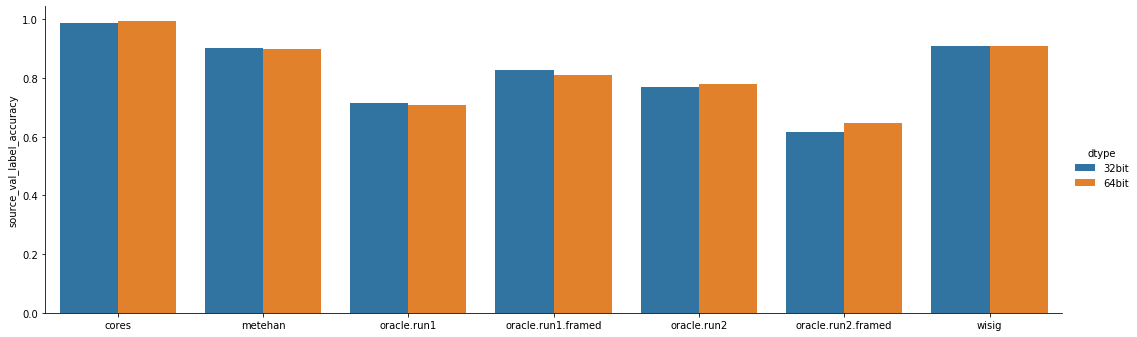

In [10]:
fg = sns.catplot(x='experiment_name', y='source_val_label_accuracy', hue='dtype', 
                        data=g, kind='bar', height=5, aspect=3)
fg.set_xlabels('')

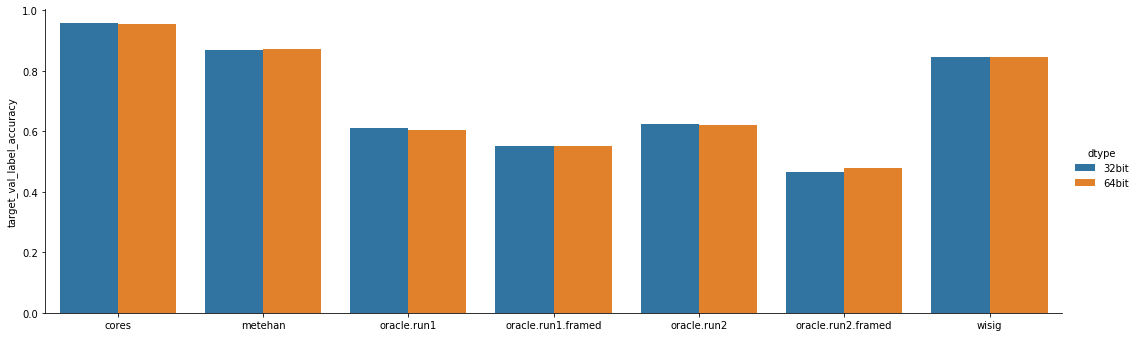

In [11]:
fg = sns.catplot(x='experiment_name', y='target_val_label_accuracy', hue='dtype', 
                        data=g, kind='bar', height=5, aspect=3)
fg.set_xlabels('')

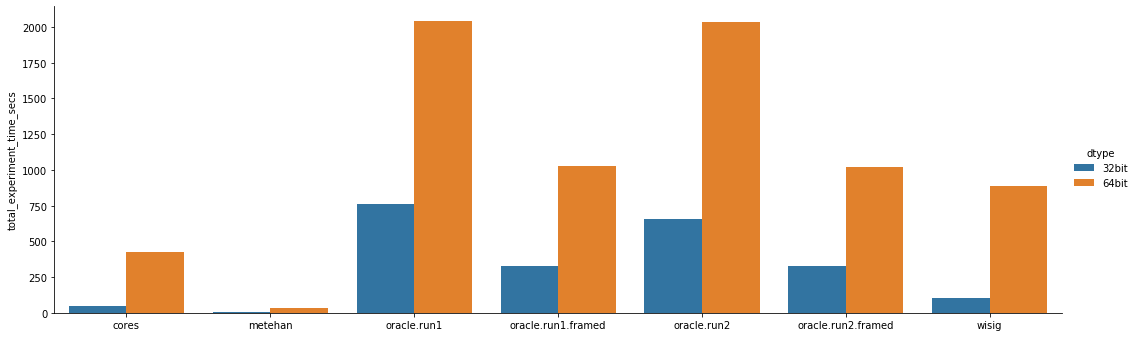

In [13]:
fg = sns.catplot(x='experiment_name', y='total_experiment_time_secs', hue='dtype', 
                        data=g, kind='bar', height=5, aspect=3)
fg.set_xlabels('')

In [14]:
g = all_trials.groupby(["experiment_name", "dtype"])[["total_experiment_time_secs"]].mean()
g = g.reset_index()
# g.plot(kind="bar")
g

,experiment_name,dtype,total_experiment_time_secs
0,cores,32bit,46.089337
1,cores,64bit,428.475755
2,metehan,32bit,6.458951
3,metehan,64bit,30.224226
4,oracle.run1,32bit,764.317101
5,oracle.run1,64bit,2042.688514
6,oracle.run1.framed,32bit,330.631398
7,oracle.run1.framed,64bit,1024.315764
8,oracle.run2,32bit,658.143962
9,oracle.run2,64bit,2036.799740
